># Analysis of sales in different regions

## Importing libraries to use

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plot 
import matplotlib.dates as mdates

## Extracting data from an Excel within a DataFrame

In [4]:
df = pd.read_excel('Financial_Sample.xlsx')
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


## Testing data selections with Pandas

In [5]:
df.iloc[:3, :2]

,Segment,Country
0,Government,Canada
1,Government,Germany
2,Midmarket,France


In [32]:
df1 = df.set_index('Country')
df1.loc['Canada', ['Product','Segment']]

,Product,Segment
Country,,
Canada,Carretera,Government
Canada,Montana,Channel Partners
Canada,Montana,Enterprise
Canada,Montana,Enterprise
Canada,Paseo,Government
...,...,...
Canada,Paseo,Midmarket
Canada,Paseo,Midmarket
Canada,VTT,Government


In [33]:
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


## Analyzing the types of data to work with.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

># Analysis section

## -Which country had the highest sales?

## According to the analysis the country that obtained the highest sales was United States with 21.05%.

In [44]:
sales_country = df.groupby('Country')[' Sales'].sum()
sales_country

Country
Canada                      2.488765e+07
France                      2.435417e+07
Germany                     2.350534e+07
Mexico                      2.094935e+07
United States of America    2.502983e+07
Name:  Sales, dtype: float64

<AxesSubplot:xlabel='Country'>

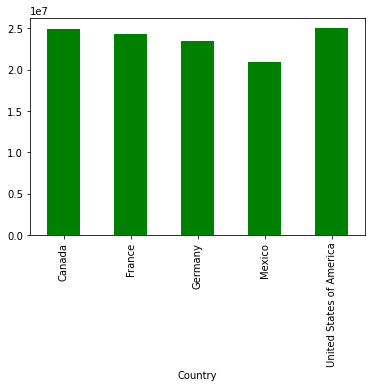

In [9]:
sales_country.plot(kind= 'bar', color= 'green')

In [10]:
total_sales = np.sum(df[' Sales'])
total_sales
(sales_country['United States of America']/total_sales)*100

21.081950308576776

## - On what date did Canada get the most sales?

In [11]:
df2 = df.set_index('Country')
df_Canada = df2.loc['Canada', [' Sales', 'Date', 'Year', 'Month Name', 'Month Number']]
df_Canada.isnull().values.any()

False

In [12]:
df_Canada[' Sales'].max()

1038082.5

In [13]:
df_Canada['Date'].loc[df_Canada[' Sales'] == 1038082.5]

Country
Canada   2014-04-01
Name: Date, dtype: datetime64[ns]

<AxesSubplot:title={'center':"Canada's Best Sales Came In 2014"}, xlabel='Month Number'>

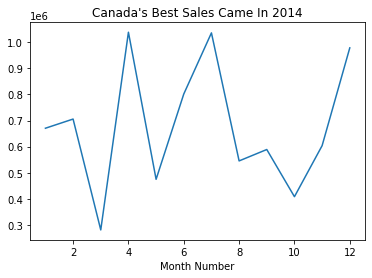

In [14]:
max_sales_months = df_Canada.groupby('Month Number')[' Sales'].max()
max_year_sales = df_Canada.groupby('Year')[' Sales'].max()
max_sales_months.plot(title= 'Canada\'s Best Sales Came In 2014')

<AxesSubplot:title={'center':"Canada's Best Selling Years"}, xlabel='Year'>

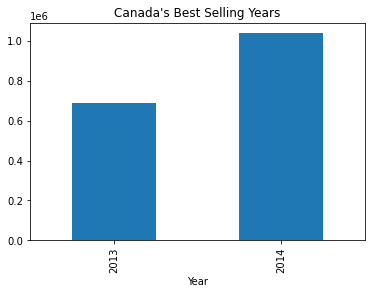

In [15]:
max_year_sales.plot(kind= 'bar', title= 'Canada\'s Best Selling Years')

In [16]:
max_sales_months

Month Number
1      670477.5
2      705600.0
3      281053.5
4     1038082.5
5      474858.0
6      801444.0
7     1035625.5
8      545334.0
9      588984.0
10     408310.0
11     603750.0
12     978236.0
Name:  Sales, dtype: float64

## - Where the lowest sales occurred?

In [17]:
sales_country

Country
Canada                      2.488765e+07
France                      2.435417e+07
Germany                     2.350534e+07
Mexico                      2.094935e+07
United States of America    2.502983e+07
Name:  Sales, dtype: float64

### It is seen that the country that obtained the percentage of sales was in Mexico with approximately 17.64%.

In [18]:
total_sales = np.sum(df[' Sales'])
total_sales
(sales_country['Mexico']/total_sales)*100

17.645073788693754

<AxesSubplot:xlabel='Country'>

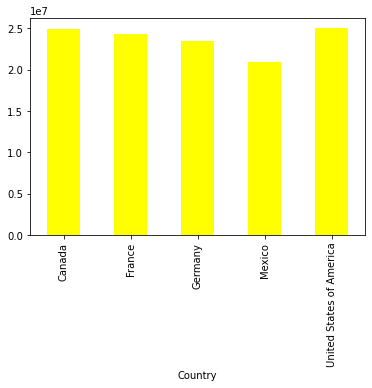

In [19]:
sales_country.plot(kind= 'bar', color= 'yellow')

## - How much was the percentage of sales that usa obtained in August?

### It is observed that the percentage of sales in the USA according to the month of August was approximately 1.69% of the total sales of all regions.It is observed that the percentage of sales in the USA according to the month of August was approximately 1.69% of the total sales of all regions.

In [20]:
usa_sales_august = df2.loc['United States of America', [' Sales', 'Month Name']]
total_august = usa_sales_august[' Sales'].loc[usa_sales_august['Month Name'] == 'August'].sum()
usa_percentaje_august = (total_august/total_sales)*100
usa_percentaje_august 

1.6906660700040628

## - How much and when was the highest selling price in Mexico?

In [40]:
mex_sales = df2.loc['Mexico', [' Sales', 'Date']]
print('The biggest sale that was made in Mexico was $'+str(np.max(mex_sales[' Sales']))+' on the date '+str(np.max(mex_sales['Date'])))

The biggest sale that was made in Mexico was $848172.5 on the date 2014-12-01 00:00:00
